In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('F:/ml tutorial/driver-data.csv')

In [3]:
dataset.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [5]:
x = dataset.iloc[:,[1,2]].values

In [6]:
# elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):                                 
    kmeans = KMeans(n_clusters=i, init = "k-means++") 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss                           

[12184626.129627975,
 1316420.8509477186,
 992634.060670247,
 719601.5383469037,
 534638.1242580615,
 372842.80452495517,
 319741.1960743506,
 276890.7610888239,
 252680.5191058496,
 230338.73163844456]

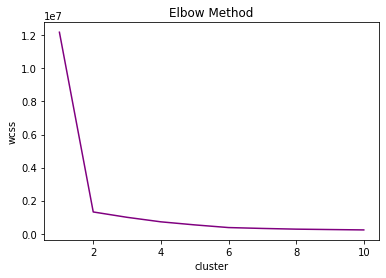

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, c='purple')
plt.xlabel("cluster")
plt.ylabel("wcss")
plt.title('Elbow Method')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)   

In [11]:
kmeans.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763437,   8.82875   ]])

In [13]:
import numpy as np
unique, counts = np.unique(y_kmeans,return_counts=True)
print (dict(zip(unique,counts)))

{0: 800, 1: 3200}


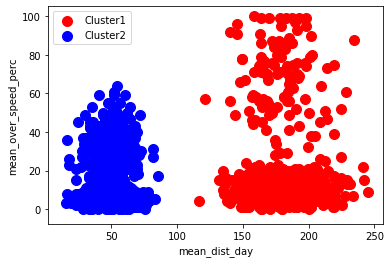

In [14]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.legend()
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()